In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Data Creation

In [2]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])

# print mean_01
# print cov_01

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
print (dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


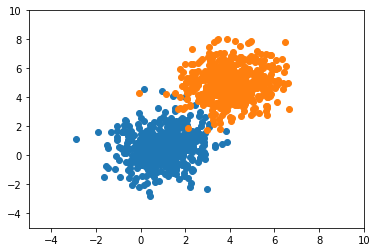

In [3]:
plt.figure(0)
plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1])#, color='red')
plt.show()

In [4]:
data = np.concatenate((dist_01, dist_02))
print (data.shape)

print (data.min(), data.max())

(1000, 2)
-2.8909898749246774 8.025967126571135


# K-Means Clustering

In [5]:
K = 2 # Number of Clusters

clusters = {} #Dictionary of Clusters

for ix in range(K): #Initialization
    center = {
        'coords': np.random.uniform(data.min(), data.max(), (data.shape[1],)), #Initializing coordinates (numpy array of length 2 i.e. x and y coordinates) with random values in the range of min to max
        'history': [], #History of coordinates for seeing progress
        'points': [], # List of Points in a cluster
    }
    clusters[ix] = center
print (clusters)

colors = ['red', 'yellow', 'cyan', 'orange','green','blue','magenta'] #Colour list for graph colours

{0: {'coords': array([1.98294716, 6.49151163]), 'history': [], 'points': []}, 1: {'coords': array([1.01506834, 1.99922054]), 'history': [], 'points': []}}


In [6]:
def distance(point1, point2): # Eucledian Distance between point1 (numpy array of length 2 having x an y coordinates) and point2
    return np.sqrt((point1[1]-point2[1])**2 + (point1[0]-point2[0])**2)

Points in cluster 0 are 499
Points in cluster 1 are 501
Cluster 0 : 
Before updating : [4.06715961 5.06761893]
After updating : [4.04058673 5.03011404]
Cluster 1 : 
Before updating : [1.00619735 0.60301241]
After updating : [0.97767681 0.56016507]


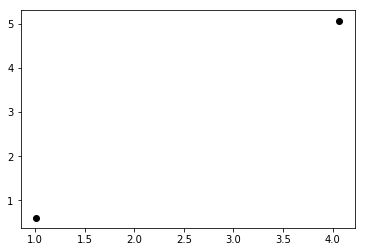

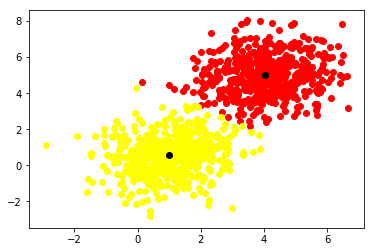

In [9]:
#Run this cell multiple times to perform k means clustering iteratively while seeing the progress

plt.figure(0)
for ix in range(data.shape[0]): #Iterating over the data
    d = []
    for cx in range(K): #Iterating over clusters
        # Compute and append distances
        d.append(distance(clusters[cx]['coords'],data[ix]))
    # Get the min distance cluster
    midx = d.index(min(d))
    # Append point to cluster
    clusters[midx]['points'].append(data[ix])

for cx in range(K): #Printing number of points in a cluster
    print("Points in cluster "+str(cx)+" are "+ str(len(clusters[cx]['points'])))

# Visualize cluster centers
for cx in range(K):
    plt.scatter(clusters[cx]['coords'][0], clusters[cx]['coords'][1], color='black')

plt.figure(1)
# Update cluster centers
for cx in range(K):
    print("Cluster "+str(cx)+" : ")
    # Update history
    clusters[cx]['history'].append(np.copy(clusters[cx]['coords'])) #Appending numpy array's copy so that it does not pass a pointer to the nparray
    if len(clusters[cx]['points']) is not 0:
        # Reinitialize cluster center with mean
        mx=0
        my=0
        for x in clusters[cx]['points']:
            mx=mx + x[0]
            my=my + x[1]
            #print(mx,my)
        mx=mx/len(clusters[cx]['points'])
        my=my/len(clusters[cx]['points'])
        print("Before updating : " + str(clusters[cx]['coords']))
        clusters[cx]['coords'][0] = mx
        clusters[cx]['coords'][1] = my
        print("After updating : " + str(clusters[cx]['coords']))
        pts = np.asarray(clusters[cx]['points'])
        plt.scatter(pts[:, 0], pts[:, 1], color=colors[cx])
    plt.scatter(clusters[cx]['coords'][0], clusters[cx]['coords'][1], color='black')
    # Empty points in cluster
    clusters[cx]['points'] = []
plt.show()

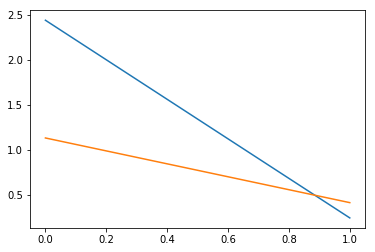

In [10]:
plt.figure(0) #Plotting History
for cx in range(K):
    d = []
    for pt in range(1, len(clusters[cx]['history'])):
        d.append(distance(clusters[cx]['history'][pt], clusters[cx]['history'][pt-1]))
    plt.plot(d)
plt.show()